# **DSCI 100: Project: Predicting Usage of a Video Game Server**

### Name: Daniel Bakker
### Student Number: 31675697

In [1]:
library(tidyverse)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


**1) Data Description**

Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics (report values to 2 decimal places), number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

The datasets, named players.csv and sessions.csv, showcase the details/information of each individual player that joined and played in the Minecraft server; displaying how long they spent in the server, the exact start to end date of their sessions and more. There are 7 variables in players.csv: experience, subscribe, hashedEmail, played_hours, name, gender, age and 196 observations within that dataset. For sessions.csv, there are 5 variables: hashedEmail, start_time, end_time, original_start_time, and original_end_time, and 1535 observations.



**2) Question**

Clearly state ONE BROAD QUESTION that you will address, and the specific question that you have formulated. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.

Broad Question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Specific Question: Can Age predict experience/time_played in players.csv?

The dataset players.csv displays each individual player's age in years, their level of experience on the video game, and the total hours they spent playing on the server. With data from nearly 200 unique individuals who've played on the server, we receive a range of different ages, levels of experience, and total time spent in the server. I can utilize the given variables from the dataset which include each individual's unique information to create different types of visualizations and predictions toward which age group should be targetted when recruiting based off the number of players in each age group, which age group has played the least/most, and the age groups with the least/most experience in the game. 

**3) Exploratory Data Analysis and Visualization**

In this assignment, you will:

Demonstrate that the dataset can be loaded into R.

Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
Make a few exploratory visualizations of the data to help you understand it.

Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question

*Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.*

In [10]:
# Demonstration that the dataset can be loaded into R

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
# Computing the mean value for each quantitative variable in the players.csv data set

players_mean_age <- players |>
    summarize(mean_age = mean(Age, na.rm = TRUE), mean_playedhours = mean(played_hours, na.rm = TRUE))

players_mean_age

mean_age,mean_playedhours
<dbl>,<dbl>
21.13918,5.845918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


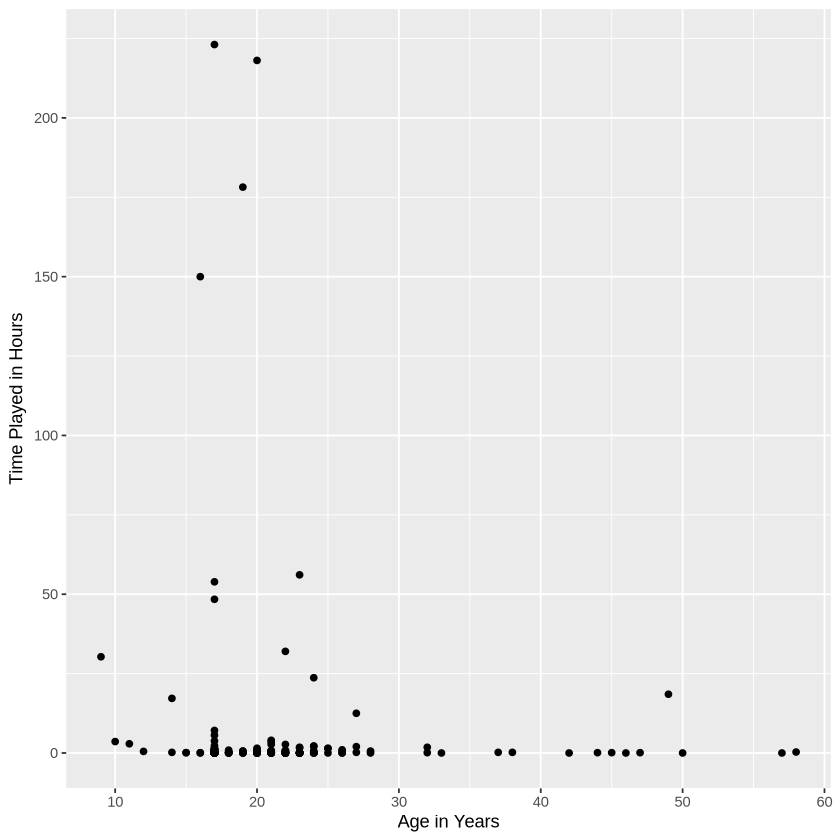

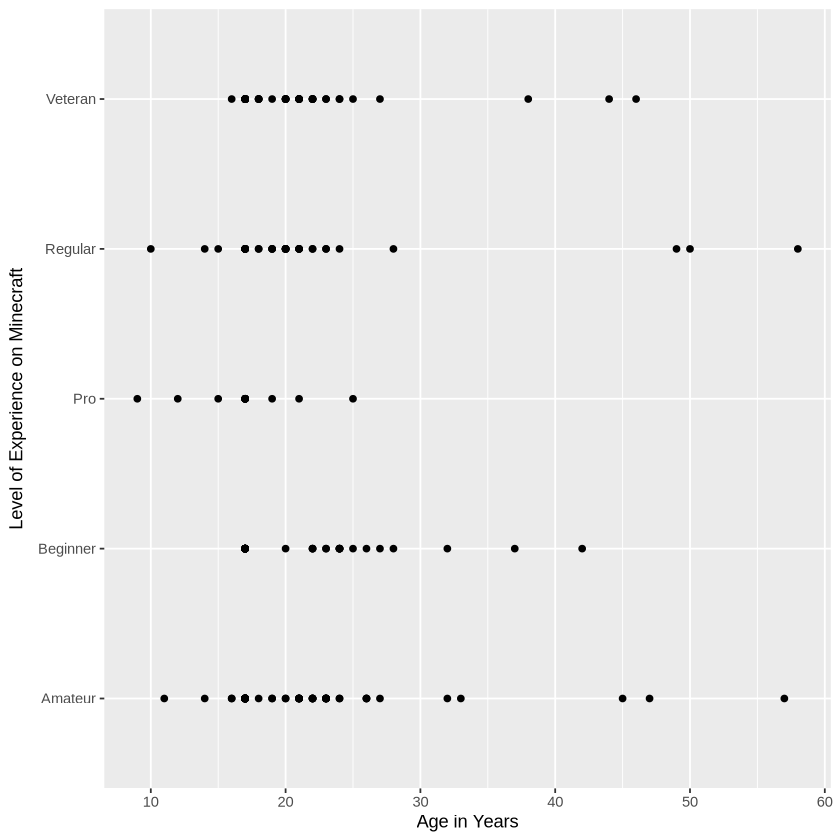

In [12]:
# scatterplot visualizations for Age vs played_hours, and Age vs experience

players_plot_1 <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "Age in Years", y = "Time Played in Hours")
players_plot_1

players_plot_2 <- players |>
    ggplot(aes(x = Age, y = experience)) +
    geom_point() +
    labs(x = "Age in Years", y = "Level of Experience on Minecraft")
players_plot_2

I created 2 separate scatterplots with Age on the x-axis, and played_hours or experience on the y-axis. 

Based off the scatterplot for Age and played_hours, most players who played in the server lie between the age of 10 - 30 years old. As for total time played per individual, the majority of the players have played between 0 to 50 hours, with the majority of that group of players playing under 20 hours. Overall, most players are 10-30 years old and have played between 0 to 20 hours.

Based off the second scatterplot which represents Age and experience, the majority of players once again lie between 10-30 years old. Amongst those players, the number of players for each experience level is spread out fairly evenly, with only "Pro" visually having around half as many as as the mean number of the rest. From this scatterplot we can see a few more details, such as the fact most beginners are between 20-30 years old, most "Pro" players are younger; with the oldest "Pro" being 25, and that "Veteran", "Regular", and "Amateur" players are primarily 15-25 years old.

**4) Methods and Plan**

Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
(5) GitHub Repository

*Provide the link to your GitHub repository for the project. You must have at least five commits with a description of the work that has been done towards completion of the individual report in the commit history of this repository.*

**(5) GitHub Repository**

Provide the link to your GitHub repository for the project. You must have at least **five commits** with a description of the work that has been done towards completion of the individual report in the commit history of this repository. 